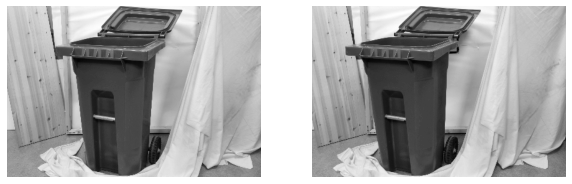

In [81]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# imgL_small = cv2.imread('Data/tsukuba/tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
# imgR_small = cv2.imread('Data/tsukuba/tsukuba_R.png', cv2.IMREAD_GRAYSCALE)

# imgL = cv2.imread('Middlebury/MiddEval3-data-F/MiddEval3/trainingF/Pipes/im0.png', cv2.IMREAD_GRAYSCALE)
# imgR = cv2.imread('Middlebury/MiddEval3-data-F/MiddEval3/trainingF/Pipes/im1.png', cv2.IMREAD_GRAYSCALE)

imgL = cv2.imread('Data/Recycle-perfect/im0.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('Data/Recycle-perfect/im1.png', cv2.IMREAD_GRAYSCALE)
imgL_small = cv2.resize(imgL, (0,0), fx=1/7, fy=1/7) 
imgR_small = cv2.resize(imgR, (0,0), fx=1/7, fy=1/7) 
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(imgL_small, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(imgR_small, cmap='gray')
plt.axis('off')
plt.show()

In [78]:
# calculate disparity map using the block matching algorithm
fx = 2945.377        # lense focal length
baseline = 178.232  # distance in mm between the two cameras
disparities = 16   # num of disparities to consider
block = 8          # block size to match
units = 0.001       # depth units

print(imgL_small.shape)

disparity = np.zeros_like(imgR_small)

for i in range(block, imgL_small.shape[0] - block - 1):
    # print(i)
    for j in range(block + disparities, imgL_small.shape[1] - block - 1):
        ssd = np.empty([disparities, 1])

        # calc SSD at all possible disparities
        l = imgL_small[(i - block):(i + block), (j - block):(j + block)]
        for d in range(0, disparities):
            r = imgR_small[(i - block):(i + block), (j - d - block):(j - d + block)]
            ssd[d] = np.sum((l[:,:]-r[:,:])**2)

        # select the best match
        disparity[i, j] = np.argmin(ssd)

(275, 409)


In [79]:
stereo = cv2.StereoBM_create(numDisparities=disparities, blockSize=block*2+1)
disparity2 = stereo.compute(imgL_small, imgR_small)

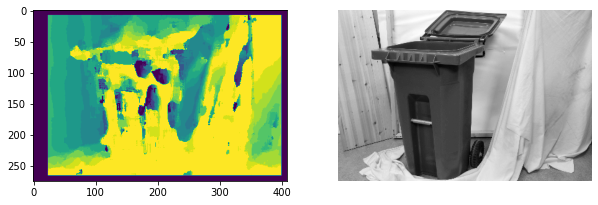

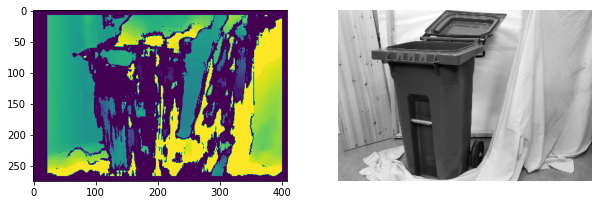

In [80]:

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(disparity)
# plt.colorbar()
fig.add_subplot(1, 2, 2)
plt.imshow(imgR_small, cmap='gray')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(disparity2)
# plt.colorbar()
fig.add_subplot(1, 2, 2)
plt.imshow(imgR_small, cmap='gray')
plt.axis('off')
plt.show()